In [1]:
%matplotlib inline
import numpy as np
from scipy.constants import e
import matplotlib.pyplot as plt
import sys
from copy import deepcopy

import ocelot as oclt

from chimera.moduls.species import Specie
from chimera.moduls.solvers import Solver
from chimera.moduls.chimera_main import ChimeraRun
from chimera.moduls.diagnostics import Diagnostics
from chimera.moduls import fimera as chimera

initializing ocelot...


In [2]:
SimLgth = 1000.
pz0 = 100.
Chrg = 300e-12
Size = 1.

nmax = Chrg/e/((Size*1.e-4)**3*(2*np.pi)**1.5)/(1.1e21)

## CHIMERA with solver in "StaticKick" mode

In [3]:
xmin, xmax = -15.*Size,15.*Size
lrg = 30*Size
Nx = 300
Nr = 300

dx = (xmax-xmin)/Nx
dr = lrg/Nr
dt = 1.0

solver_in = {
    'Grid':(xmin, xmax,lrg,dx,dr),'TimeStep':dt,'MaxAzimuthMode':1,
    'Features':('StaticKick',),'Xchunked':(4,6)
}

beam_in = {
    'Grid':(xmin, xmax,lrg,dx,dr),'TimeStep':dt,'Charge':-1.,'Mass':1.,
    'Density':nmax, 'RandCell':500,'MomentaMeans':(pz0,0.,0.),'MomentaSpreads':(pz0*0.8,pz0*1e-3,pz0*1e-3),
    'Xchunked':(4,6),'Features':{'FlatSpectrum',}
}

solver = Solver(solver_in)
beam = Specie(beam_in)

MovingFrame = {'TimeStep':dt,'Steps':1,'Features':('NoSorting','Staged')}

chimera_in = {
    'Solvers':(),'Particles':(beam,),'MovingFrames':(MovingFrame,)
}

fu = lambda x,y,z: np.exp(-0.5*(x**2+y**2+z**2)/Size**2)
beam.add_particles(*beam.gen_parts(Domain=(-3.5*Size,3.5*Size, 0.0, 3.5*Size),ProfileFunc=fu))

Chimera = ChimeraRun(chimera_in)
Diags = Diagnostics(Chimera,(),out_folder=None)

for i in range(int(SimLgth/dt)+1):
    Chimera.make_step(i)
    sys.stdout.write('\r'+str(i)+'/'+str(int(SimLgth/dt)))
    sys.stdout.flush()  

Constructing solver with cylindric boundaries:
    left=-15, right=15, radius=30
Spatial and temporal resolutions:
    dx=0.1, dr=0.1, dt=1
Grid resolutions are:
    Nx=304, Nr=300, Mo=2
Charge density will be considered
141/1000

KeyboardInterrupt: 

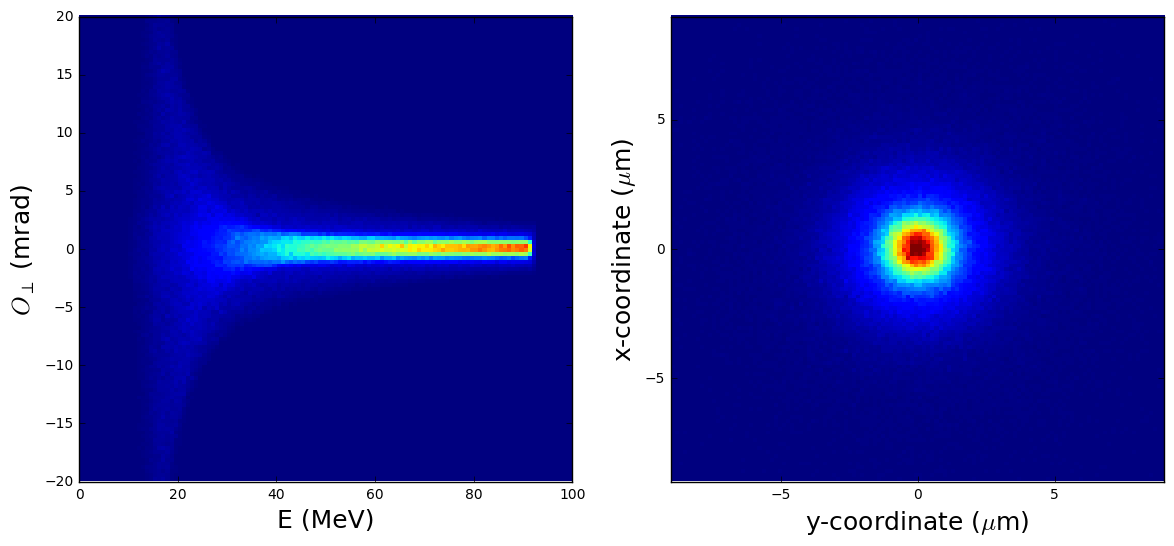

In [38]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,6),dpi=200)


pl1 = ax1.hist2d(beam.Data['momenta'][0]*0.511,beam.Data['momenta'][2]/beam.Data['momenta'][0]*1e3,
           weights=-beam.Data['weights'],
           bins=120,range=[[0,100],[-20,20]],vmax=5e-3)[-1];
pl2 = ax2.hist2d(beam.Data['coords'][1],beam.Data['coords'][2],weights=-beam.Data['weights'],
           bins=120,range=[[-0.3*lrg,0.3*lrg],[-0.3*lrg,0.3*lrg]],vmax=4e-3)[-1];
    
ax1.set_ylabel('$O_\perp$ (mrad)',fontsize=18)
ax1.set_xlabel('E (MeV)',fontsize=18)
ax2.set_ylabel('x-coordinate ($\mu$m)',fontsize=18)
ax2.set_xlabel('y-coordinate ($\mu$m)',fontsize=18)

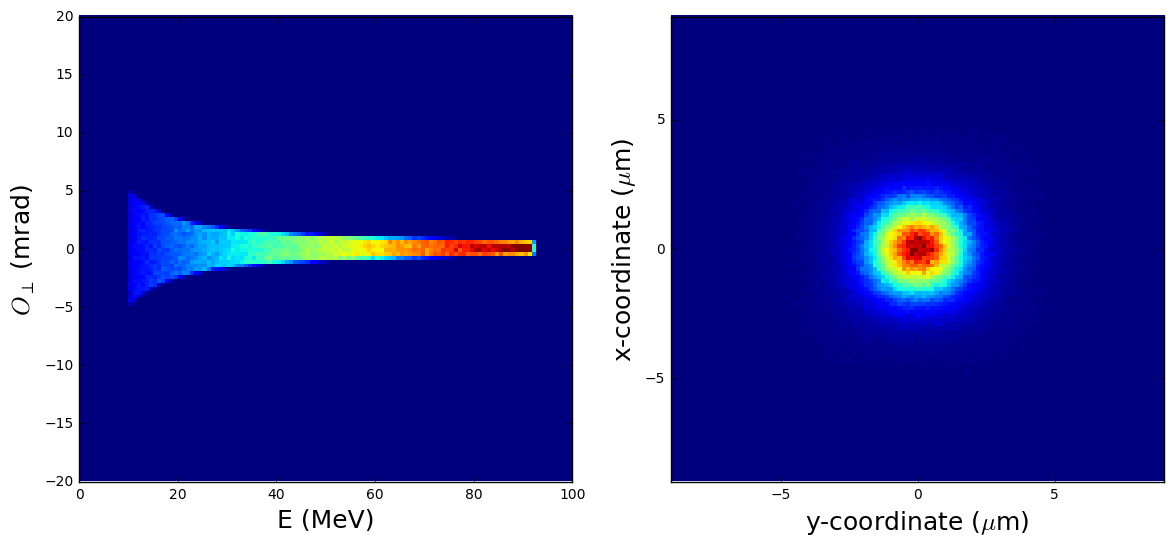

In [36]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,6),dpi=200)


pl1 = ax1.hist2d(beam.Data['momenta'][0]*0.511,beam.Data['momenta'][2]/beam.Data['momenta'][0]*1e3,
           weights=-beam.Data['weights'],
           bins=120,range=[[0,100],[-20,20]],vmax=5e-3)[-1];
pl2 = ax2.hist2d(beam.Data['coords'][1],beam.Data['coords'][2],weights=-beam.Data['weights'],
           bins=120,range=[[-0.3*lrg,0.3*lrg],[-0.3*lrg,0.3*lrg]],vmax=4e-3)[-1];
    
ax1.set_ylabel('$O_\perp$ (mrad)',fontsize=18)
ax1.set_xlabel('E (MeV)',fontsize=18)
ax2.set_ylabel('x-coordinate ($\mu$m)',fontsize=18)
ax2.set_xlabel('y-coordinate ($\mu$m)',fontsize=18)

In [46]:
#withSC = deepcopy(beam.Data)
#withoutSC = deepcopy(beam.Data)

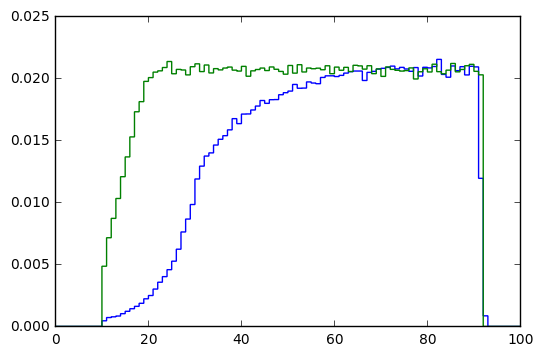

In [62]:
beam.Data = withSC
fltr = ((beam.Data['momenta'][1:3]**2/beam.Data['momenta'][0]**2).sum(0)**.5*1e3<3)
plt.hist(beam.Data['momenta'][0]*0.511,weights=-beam.Data['weights']*fltr,bins=100,histtype='step',range=[0,100]);

beam.Data = withoutSC
fltr = ((beam.Data['momenta'][1:3]**2/beam.Data['momenta'][0]**2).sum(0)**.5*1e3<3)
plt.hist(beam.Data['momenta'][0]*0.511,weights=-beam.Data['weights']*fltr,bins=100,histtype='step',range=[0,100]);